In [1]:
# Script to hide code

# from IPython.display import HTML

# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# import warnings
import pandas as pd
import numpy as np
import nltk
import collections
import random
import matplotlib.pyplot as plt
import seaborn as sns

# import matplotlib.pyplot as plt
# import seaborn as sns
# import os
# import re
# import math
# from sqlalchemy import create_engine
# import pymysql
# import requests
# from bs4 import BeautifulSoup
# from sklearn.linear_model import LinearRegression
# from statsmodels.tsa.ar_model import AR
# from statsmodels.tools.eval_measures import rmse
# from scipy import stats

In [3]:
pd.set_option('display.max_columns', 100)
# warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('./clean_data/clean_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
%run ./main.py

**Dataframe with basic taste.**

In [6]:
df_with_tastes = df_processed[['strDrink', 'Ingredients', 'Alc_type', 'Basic_taste']]

In [7]:
# Replace non-alcoholic ingredients as they are with basic tastes

df_with_tastes['Ingredients'] = np.where(~df_with_tastes['Basic_taste'].isnull(), df_with_tastes['Basic_taste'],
                                                                                                 df_with_tastes['Ingredients'])
df_with_tastes.drop(['Alc_type', 'Basic_taste'], axis=1, inplace=True)

In [8]:
# Reallocate ingredients as columns so each column takes only one row

df_with_tastes = df_with_tastes[df_with_tastes['Ingredients'] != 'Ingredients']
s =  df_with_tastes.groupby('strDrink').cumcount().add(1)
df_with_tastes = (df_with_tastes.set_index(['strDrink',s])
        .unstack()
        .sort_index(axis=1, level=1)
       )
df_with_tastes.columns = ['{}_{}'.format(a, b) for a,b in df_with_tastes.columns]

df_with_tastes = df_with_tastes.reset_index()

In [9]:
# Combine all ingredients per cocktial in one column

df_with_tastes['Ingredients'] = df_with_tastes.drop(['strDrink'], axis=1).fillna('').apply(lambda x: ' '.join(x), axis=1)
df_with_tastes = df_with_tastes[['strDrink', 'Ingredients']]

**Pairs, formed using basic taste.**

In [10]:
# Generate pairs from ingredients of each cocktail and combine them in one list

bigram = [list(nltk.bigrams(nltk.word_tokenize(i))) for i in df_with_tastes['Ingredients']]
pairs_list = [j for i in bigram for j in i]
# print(len(pairs_list))
# pairs_list[:10]

In [11]:
# First, define a list of tuples to be amended

to_aligh = []
for a in pairs_list:
    for b in pairs_list:
        if a != b:
            if b[1] == a[0]:
                if b[0] == a[1]:            # If both elements of tuple are equal to the swopped tuple under the check
                    if a not in to_aligh and b not in to_aligh:
                        to_aligh.append(b)

In [12]:
# Next, amend them

pairs_taste_list_aligned = []
for i in pairs_list:
    if i in to_aligh:
        pairs_taste_list_aligned.append((i[1], i[0]))
    else:
        pairs_taste_list_aligned.append(i)

In [13]:
# Check that total number of tuples hasn't changed, only content should be amended

len(pairs_taste_list_aligned) == len(pairs_list)

In [14]:
pairs_list_flat = [(i[0]+', '+i[1]) for i in pairs_taste_list_aligned]
pairs = pd.DataFrame(pairs_list_flat, columns=['pairs'])
pairs['pairs'] = pairs['pairs'].apply(lambda x: x.replace('_', ' '))

In [15]:
freq = pd.DataFrame(pairs['pairs'].value_counts()).reset_index()
freq.columns = ['pairs', 'frequency']

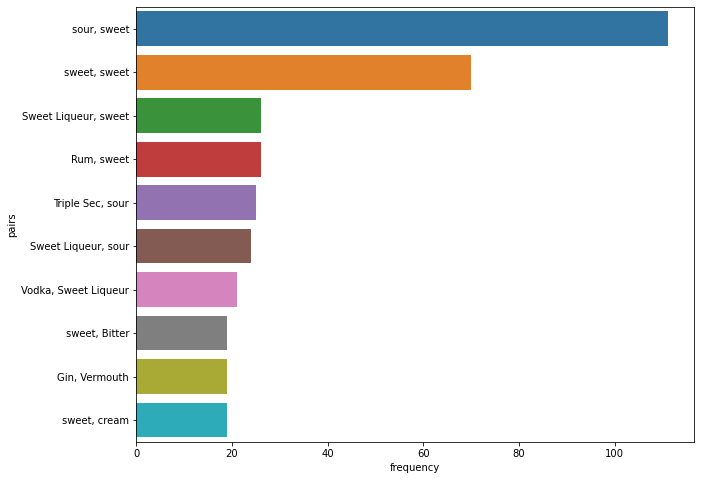

In [16]:
# Plot the most common pairs

plt.figure(figsize = (10,8))
# ax = pairs['pairs'].value_counts().nlargest(20).plot.barh()
sns.barplot(x='frequency', y='pairs', data=freq.nlargest(10, columns='frequency'))
plt.show()

In [17]:
n = len(freq.loc[freq['frequency'] == 1])
f'Pairs appeared only once: {n}.'

'Pairs appeared only once: 57.'

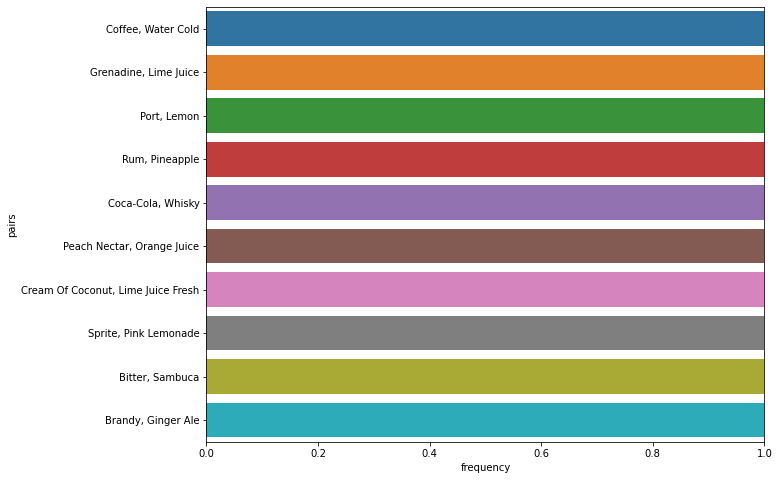

In [26]:
# Plot the least common pairs

plt.figure(figsize = (10,8))
sns.barplot(x='frequency', y='pairs', data=freq.nsmallest(10, columns='frequency'))
plt.show()

**Pairs, formed using original non-alcoholic ingredients.**

In [19]:
pairs_list_flat = [(i[0]+', '+i[1]) for i in pairs_list_aligned]
pairs = pd.DataFrame(pairs_list_flat, columns=['pairs'])
pairs['pairs'] = pairs['pairs'].apply(lambda x: x.replace('_', ' '))

# '''To file for Tableau'''

In [20]:
freq = pd.DataFrame(pairs['pairs'].value_counts()).reset_index()
freq.columns = ['pairs', 'frequency']

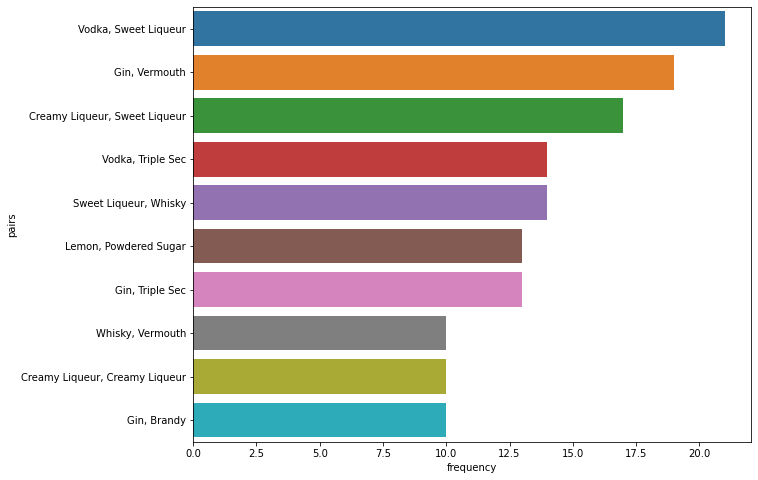

In [21]:
# Plot the most common pairs

plt.figure(figsize = (10,8))
# ax = pairs['pairs'].value_counts().nlargest(20).plot.barh()
sns.barplot(x='frequency', y='pairs', data=freq.nlargest(10, columns='frequency'))
plt.show()

In [22]:
n = len(freq.loc[freq['frequency'] == 1])
f'Pairs appeared only once: {n}.'

'Pairs appeared only once: 292.'

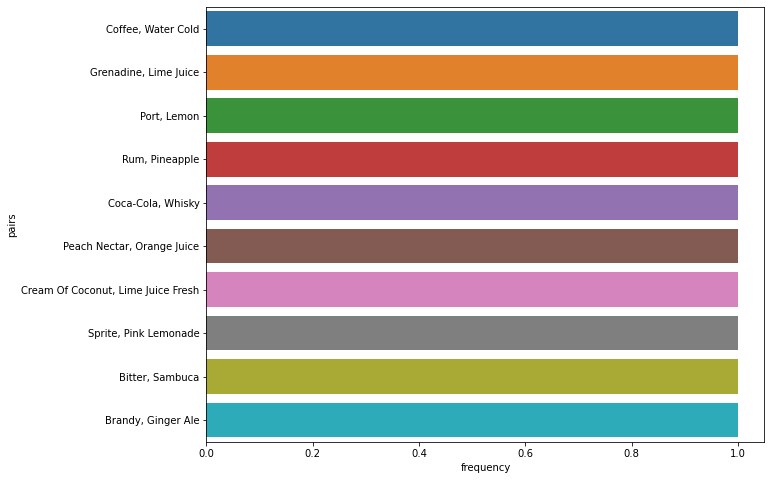

In [23]:
# Plot the least common pairs

plt.figure(figsize = (10,8))
sns.barplot(x='frequency', y='pairs', data=freq.nsmallest(10, columns='frequency'))
plt.show()

In [43]:
freq = pd.DataFrame(df_processed['Ingredients'].value_counts()).reset_index()
freq.columns = ['ingredient', 'frequency']

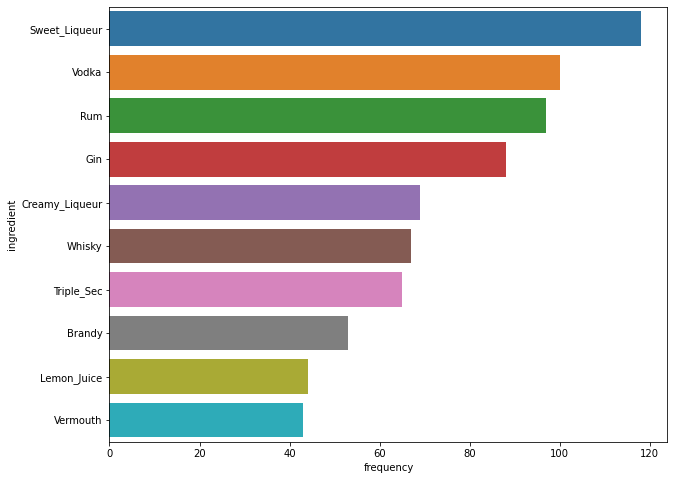

In [44]:
plt.figure(figsize = (10,8))
sns.barplot(x='frequency', y='ingredient', data=freq.nlargest(10, columns='frequency'))
plt.show()

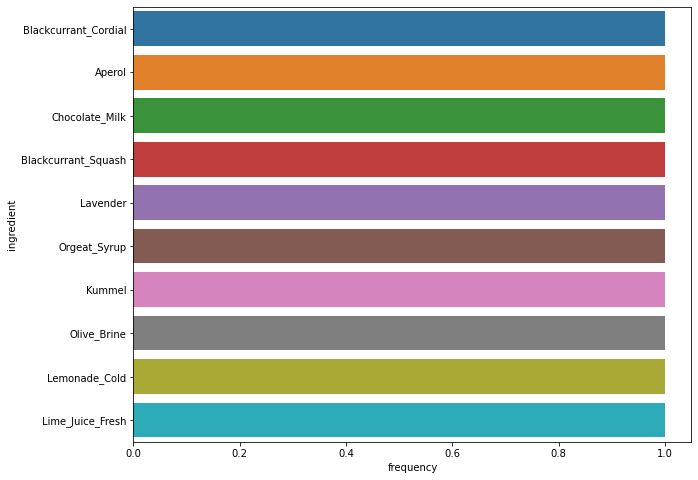

In [45]:
plt.figure(figsize = (10,8))
sns.barplot(x='frequency', y='ingredient', data=freq.nsmallest(10, columns='frequency'))
plt.show()

In [38]:
df_processed['Ingr_with_basic_taste'] = np.where(~df_processed['Basic_taste'].isnull(), df_processed['Basic_taste'],
                                                                                                 df_processed['Alc_type'])

In [39]:
freq = pd.DataFrame(df_processed['Ingr_with_basic_taste'].value_counts()).reset_index()
freq.columns = ['ingredient', 'frequency']

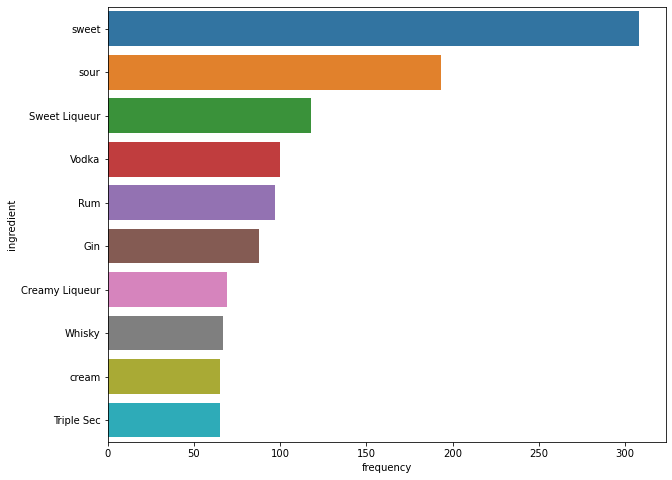

In [40]:
plt.figure(figsize = (10,8))
sns.barplot(x='frequency', y='ingredient', data=freq.nlargest(10, columns='frequency'))
plt.show()

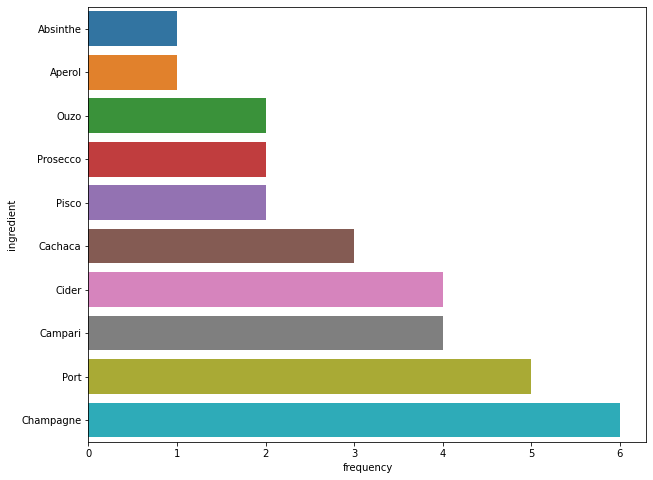

In [42]:
plt.figure(figsize = (10,8))
sns.barplot(x='frequency', y='ingredient', data=freq.nsmallest(10, columns='frequency'))
plt.show()